In [6]:
from __future__ import print_function

import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import tensorflow as tf
import scipy


from skimage.transform import resize
from skimage.io import imsave
from keras.models import Model
from keras.layers import Input, concatenate, Dense, Flatten, Conv3D, MaxPooling3D, Conv3DTranspose, GlobalAveragePooling3D, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras import backend as K
from keras.callbacks import History

%config Completer.use_jedi = False

In [43]:
img = nib.load('01_m.nii').get_fdata()
np.min(img), np.max(img), img.shape, type(img), np.average(img)

(0.0,
 0.9999999997671694,
 (192, 192, 192),
 numpy.ndarray,
 0.0027845877181740006)

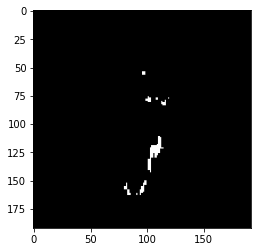

In [44]:
imgSlice = img[120,:,:]
plt.imshow(imgSlice, cmap='gray') 
plt.show()

In [45]:
img_smol = scipy.ndimage.zoom(input=img,zoom=0.5)

In [46]:
np.min(img_smol), np.max(img_smol), img_smol.shape, type(img_smol), np.average(img_smol)

(-0.4903946089664628,
 1.5796769767445615,
 (96, 96, 96),
 numpy.ndarray,
 0.002758936907571666)

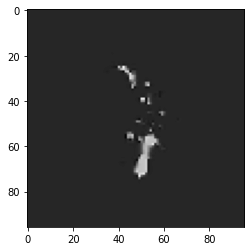

In [47]:
imgSlice = img_smol[35,:,:]
plt.imshow(imgSlice, cmap='gray') 
plt.show()

In [48]:
img_smol_normalized = (img_smol - np.min(img_smol))/(np.max(img_smol) - np.min(img_smol))

In [49]:
np.min(img_smol_normalized), np.max(img_smol_normalized), img_smol_normalized.shape, type(img_smol_normalized), np.average(img_smol_normalized)

(0.0, 1.0, (96, 96, 96), numpy.ndarray, 0.2382301893703097)

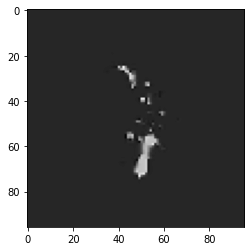

In [50]:
imgSlice = img_smol_normalized[35,:,:]
plt.imshow(imgSlice, cmap='gray') 
plt.show()